### Predictive Analytics - Assignment 2

#### Importing libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.utils import resample

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/amitbaghel/Downloads/Earnings Manipulation 220.csv')
df.head()

,Company Name,Year Ending,DSRI,GMI,AQI,SGI,DEPI,SGAI,ACCR,LEVI,MANIPULATOR
0,1,3/31/2014,1.624742,1.128927,7.185053,0.366211,1.381519,1.624145,-0.166809,1.161082,1
1,2,3/31/2009,1.000000,1.606492,1.004988,13.081433,0.400000,5.198207,0.060475,0.986732,1
2,3,3/31/2008,1.000000,1.015607,1.241389,1.475018,1.169353,0.647671,0.036732,1.264305,1
3,4,3/31/2014,1.486239,1.000000,0.465535,0.672840,2.000000,0.092890,0.273434,0.680975,1
4,5,3/31/2010,1.000000,1.369038,0.637112,0.861346,1.454676,1.741460,0.123048,0.939047,1


In [3]:
df.shape

(220, 11)

In [4]:
df.isnull().sum()

Company Name    0
Year Ending     0
DSRI            0
GMI             0
AQI             0
SGI             0
DEPI            0
SGAI            0
ACCR            0
LEVI            0
MANIPULATOR     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  220 non-null    int64  
 1   Year Ending   220 non-null    object 
 2   DSRI          220 non-null    float64
 3   GMI           220 non-null    float64
 4   AQI           220 non-null    float64
 5   SGI           220 non-null    float64
 6   DEPI          220 non-null    float64
 7   SGAI          220 non-null    float64
 8   ACCR          220 non-null    float64
 9   LEVI          220 non-null    float64
 10  MANIPULATOR   220 non-null    int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 19.0+ KB


In [6]:
df.describe()

,Company Name,DSRI,GMI,AQI,SGI,DEPI,SGAI,ACCR,LEVI,MANIPULATOR
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,110.500000,1.523289,1.103023,1.353839,1.217928,1.030118,1.413396,-0.016890,1.108600,0.177273
std,63.652704,2.828754,3.453701,3.903195,1.223330,0.354056,3.383294,0.128853,1.018647,0.382770
min,1.000000,0.015096,-20.811849,-4.712397,0.027685,0.068823,0.092890,-0.592258,0.000000,0.000000
25%,55.750000,0.917511,0.932569,0.785517,0.962646,0.930413,0.899463,-0.071370,0.913937,0.000000
50%,110.500000,1.044853,1.000000,1.015498,1.084642,1.002396,1.011575,-0.014814,1.007465,0.000000
75%,165.250000,1.300227,1.094988,1.192857,1.243118,1.087991,1.204553,0.028612,1.108551,0.000000
max,220.000000,36.291185,46.466667,52.886734,13.081433,4.229119,49.301781,0.717842,13.058559,1.000000


In [7]:
df.drop(columns = 'Year Ending', inplace = True)

#### Count the number of manipulators versus non-manipulators:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

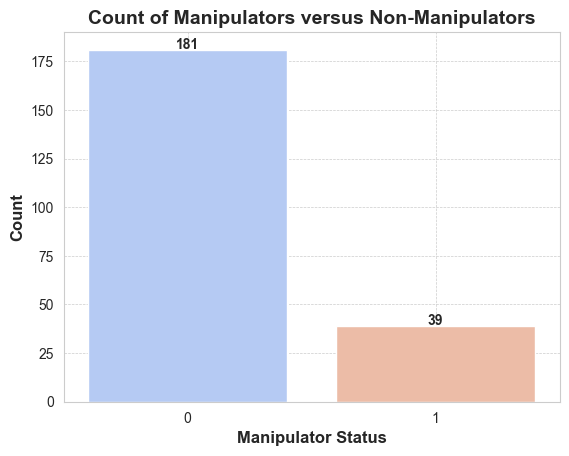

In [8]:
manipulators_count = df['MANIPULATOR'].value_counts()
sns.set_style('whitegrid')

sns.barplot(x=manipulators_count.index, y=manipulators_count.values, palette='coolwarm')
plt.xlabel('Manipulator Status', fontsize=12, weight='bold')
plt.ylabel('Count', fontsize=12, weight='bold')
plt.title('Count of Manipulators versus Non-Manipulators', fontsize=14, weight='bold')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adding data labels
for index, value in enumerate(manipulators_count):
    plt.text(index, value + 0.5, str(value), ha='center', fontsize=10, weight='bold')
plt.show()

#### Create an 80:20 partition and find positives in the test data:


In [9]:
# Create an 80:20 partition
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Find positives (MANIPULATORS) in test data
test_positives_count = test_data['MANIPULATOR'].value_counts().get(1, 0)
print(f"Number of positives (MANIPULATORS) in the test data: {test_positives_count}")

Number of positives (MANIPULATORS) in the test data: 6


#### Upsample the minority class:


In [10]:
# Separate majority and minority classes
majority_class = df[df['MANIPULATOR'] == 0]
minority_class = df[df['MANIPULATOR'] == 1]

# Upsample the minority class
minority_upsampled = resample(minority_class,
                              replace=True,  # sample with replacement
                              n_samples=len(majority_class),  # match majority class size
                              random_state=42)  # reproducibility

upsampled_df = pd.concat([majority_class, minority_upsampled])
print(f"Size of upsampled DataFrame: {upsampled_df.shape}")

Size of upsampled DataFrame: (362, 10)


#### Build various models and compare their performance:


In [11]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    metrics = {
        "model": type(model).__name__,  # Include model name in metrics
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1_score": f1_score(y_test, y_pred)
    }
    
    return metrics

# Models to evaluate
models = {
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier()
}

# Define an empty list to store evaluation metrics for each model
model_metrics = []

# Train each model and evaluate
X_train, y_train = upsampled_df.drop('MANIPULATOR', axis=1), upsampled_df['MANIPULATOR']
X_test, y_test = test_data.drop('MANIPULATOR', axis=1), test_data['MANIPULATOR']

for name, model in models.items():
    model.fit(X_train, y_train)
    metrics = evaluate_model(model, X_test, y_test)
    model_metrics.append(metrics)
upsampled_metrics_df = pd.DataFrame(model_metrics)
upsampled_metrics_df.sort_values(by=['accuracy'])

,model,accuracy,precision,recall,f1_score
0,GaussianNB,0.931818,0.800000,0.666667,0.727273
2,SVC,0.977273,0.857143,1.000000,0.923077
1,KNeighborsClassifier,1.000000,1.000000,1.000000,1.000000
3,LogisticRegression,1.000000,1.000000,1.000000,1.000000
4,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000
5,AdaBoostClassifier,1.000000,1.000000,1.000000,1.000000
6,GradientBoostingClassifier,1.000000,1.000000,1.000000,1.000000
7,XGBClassifier,1.000000,1.000000,1.000000,1.000000


#### Hyperparameter tuning using GridsearchCV

In [12]:
# Define parameter grids for each model
param_grids = {
    "Naive Bayes": {},
    "K-Nearest Neighbors": {
        "n_neighbors": [3, 5, 7, 9],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan"]
    },
    "Support Vector Machine": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"],
        "gamma": ["scale", "auto"]
    },
    "Logistic Regression": {
        "C": [0.1, 1, 10],
        "solver": ["lbfgs", "liblinear"],
        "penalty": ["l2"]
    },
    "Random Forest": {
        "n_estimators": [100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 4],
        "min_samples_leaf": [1, 2]
    },
    "AdaBoost": {
        "n_estimators": [50, 100],
        "learning_rate": [0.1, 0.5, 1]
    },
    "Gradient Boosting": {
        "n_estimators": [100, 200],
        "learning_rate": [0.1, 0.05],
        "max_depth": [3, 5]
    },
    "XGBoost": {
        "n_estimators": [100, 200],
        "max_depth": [3, 5, 7],
        "learning_rate": [0.1, 0.05],
        "subsample": [0.8, 1],
        "colsample_bytree": [0.8, 1]
    }
}

def evaluate_model(model, model_name, X_test, y_test):
    y_pred = model.predict(X_test)
    
    # Create a dictionary with metrics
    metrics = {
        "model": model_name,  # First key should be "model"
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1_score": f1_score(y_test, y_pred)
    }
    
    return metrics
model_metrics = []

# Train each model using GridSearchCV and evaluate
for name, model in models.items():
    # Conduct grid search using GridSearchCV
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Retrieve the best model with optimal hyperparameters
    best_model = grid_search.best_estimator_
    
    # Evaluate the best model using the test set
    metrics = evaluate_model(best_model, name, X_test, y_test)
    model_metrics.append(metrics)

upsampled_metrics_df = pd.DataFrame(model_metrics)
upsampled_metrics_df

,model,accuracy,precision,recall,f1_score
0,Naive Bayes,0.931818,0.8,0.666667,0.727273
1,K-Nearest Neighbors,1.000000,1.0,1.000000,1.000000
2,Support Vector Machine,1.000000,1.0,1.000000,1.000000
3,Logistic Regression,1.000000,1.0,1.000000,1.000000
4,Random Forest,1.000000,1.0,1.000000,1.000000
5,AdaBoost,1.000000,1.0,1.000000,1.000000
6,Gradient Boosting,1.000000,1.0,1.000000,1.000000
7,XGBoost,1.000000,1.0,1.000000,1.000000


#### Important Features for Predicting Manipulators:


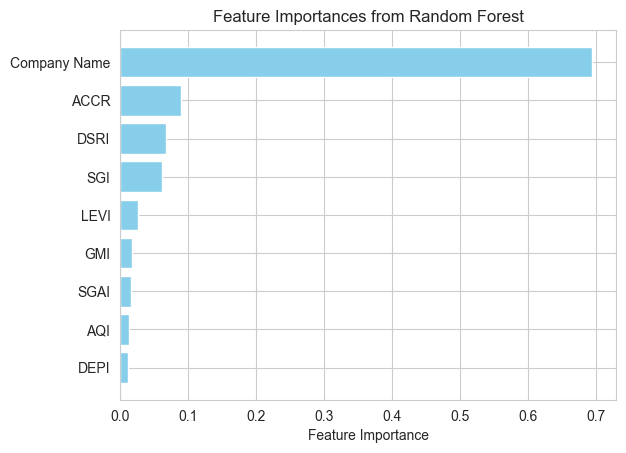

In [13]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Compute feature importances
feature_importances = rf_model.feature_importances_

feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Extract features and importances from the DataFrame
features = feature_importances_df['Feature']
importances = feature_importances_df['Importance']

#plt.figure(figsize=(10, 8))
plt.barh(features, importances, color='skyblue')

# Invert the y-axis so that the most important features are at the top
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.title('Feature Importances from Random Forest')
plt.show()

As you can see above graph and get an idea Comapny name, ACCR, SGI, DSRI LEVI are most important variable.

#### Downsample the majority class:


In [14]:
majority_downsampled = resample(majority_class,
                                replace=False,  # sample without replacement
                                n_samples=len(minority_class),  # match minority class size
                                random_state=42)  # reproducibility
downsampled_df = pd.concat([majority_downsampled, minority_class])
print(f"Size of downsampled DataFrame: {downsampled_df.shape}")

Size of downsampled DataFrame: (78, 10)


In [15]:
X = downsampled_df.drop('MANIPULATOR', axis=1)
y = downsampled_df['MANIPULATOR']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the evaluate_model function
def evaluate_model(model, model_name, X_test, y_test):
    # Predict using the provided model
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    metrics = {
        "model": model_name, 
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1_score": f1_score(y_test, y_pred)
    }
    
    return metrics

downsampled_model_metrics = []

# Iterate through each model and evaluate using the downsampled data
for name, model in models.items():
    model.fit(X_train, y_train)
    metrics = evaluate_model(model, name, X_test, y_test)  
    downsampled_model_metrics.append(metrics)

downsampled_metrics_df = pd.DataFrame(downsampled_model_metrics)
downsampled_metrics_df

,model,accuracy,precision,recall,f1_score
0,Naive Bayes,0.75,1.0,0.428571,0.6
1,K-Nearest Neighbors,1.00,1.0,1.000000,1.0
2,Support Vector Machine,1.00,1.0,1.000000,1.0
3,Logistic Regression,1.00,1.0,1.000000,1.0
4,Random Forest,1.00,1.0,1.000000,1.0
5,AdaBoost,1.00,1.0,1.000000,1.0
6,Gradient Boosting,1.00,1.0,1.000000,1.0
7,XGBoost,1.00,1.0,1.000000,1.0


#### Compare the results of using both upsampling and downsampling techniques:

In [16]:
def compare_model_performance(downsampled_metrics_df, upsampled_metrics_df):
    # Check if the 'model' column is available and matches in both DataFrames
    assert list(downsampled_metrics_df['model']) == list(upsampled_metrics_df['model']), "Model names do not match in the two DataFrames."
    comparison_data = []
    
    # Iterate through each model and compare metrics
    for idx in range(len(downsampled_metrics_df)):
        # Extract model name
        model_name = downsampled_metrics_df.loc[idx, 'model']
        
        # Get the metrics for the current model from the downsampled and upsampled DataFrames
        downsampled_metrics = downsampled_metrics_df.loc[idx]
        upsampled_metrics = upsampled_metrics_df.loc[idx]
        
        # Create a dictionary for downsampled method comparison
        downsampled_comparison = {
            "model": model_name,
            "method": "Downsampled",
            "accuracy": downsampled_metrics['accuracy'],
            "precision": downsampled_metrics['precision'],
            "recall": downsampled_metrics['recall'],
            "f1_score": downsampled_metrics['f1_score']
        }
        
        # Create a dictionary for upsampled method comparison
        upsampled_comparison = {
            "model": model_name,
            "method": "Upsampled",
            "accuracy": upsampled_metrics['accuracy'],
            "precision": upsampled_metrics['precision'],
            "recall": upsampled_metrics['recall'],
            "f1_score": upsampled_metrics['f1_score']
        }
        
        # Append the comparison data to the list
        comparison_data.append(downsampled_comparison)
        comparison_data.append(upsampled_comparison)
    comparison_df = pd.DataFrame(comparison_data)
    
    return comparison_df

comparison_df = compare_model_performance(downsampled_metrics_df, upsampled_metrics_df)
comparison_df

,model,method,accuracy,precision,recall,f1_score
0,Naive Bayes,Downsampled,0.750000,1.0,0.428571,0.600000
1,Naive Bayes,Upsampled,0.931818,0.8,0.666667,0.727273
2,K-Nearest Neighbors,Downsampled,1.000000,1.0,1.000000,1.000000
3,K-Nearest Neighbors,Upsampled,1.000000,1.0,1.000000,1.000000
4,Support Vector Machine,Downsampled,1.000000,1.0,1.000000,1.000000
5,Support Vector Machine,Upsampled,1.000000,1.0,1.000000,1.000000
6,Logistic Regression,Downsampled,1.000000,1.0,1.000000,1.000000
7,Logistic Regression,Upsampled,1.000000,1.0,1.000000,1.000000
8,Random Forest,Downsampled,1.000000,1.0,1.000000,1.000000
9,Random Forest,Upsampled,1.000000,1.0,1.000000,1.000000
